In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Let’s load the California Housing dataset**

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
house = fetch_california_housing()

In [4]:
house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(house['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(house.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(house['target'])

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


# **Preparing the dataset and analyzing the correlated features**

In [8]:
dataset = pd.DataFrame(house.data, columns=house.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
dataset["median_price"] = house['target']
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedInc        20640 non-null  float64
 1   HouseAge      20640 non-null  float64
 2   AveRooms      20640 non-null  float64
 3   AveBedrms     20640 non-null  float64
 4   Population    20640 non-null  float64
 5   AveOccup      20640 non-null  float64
 6   Latitude      20640 non-null  float64
 7   Longitude     20640 non-null  float64
 8   median_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
median_price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


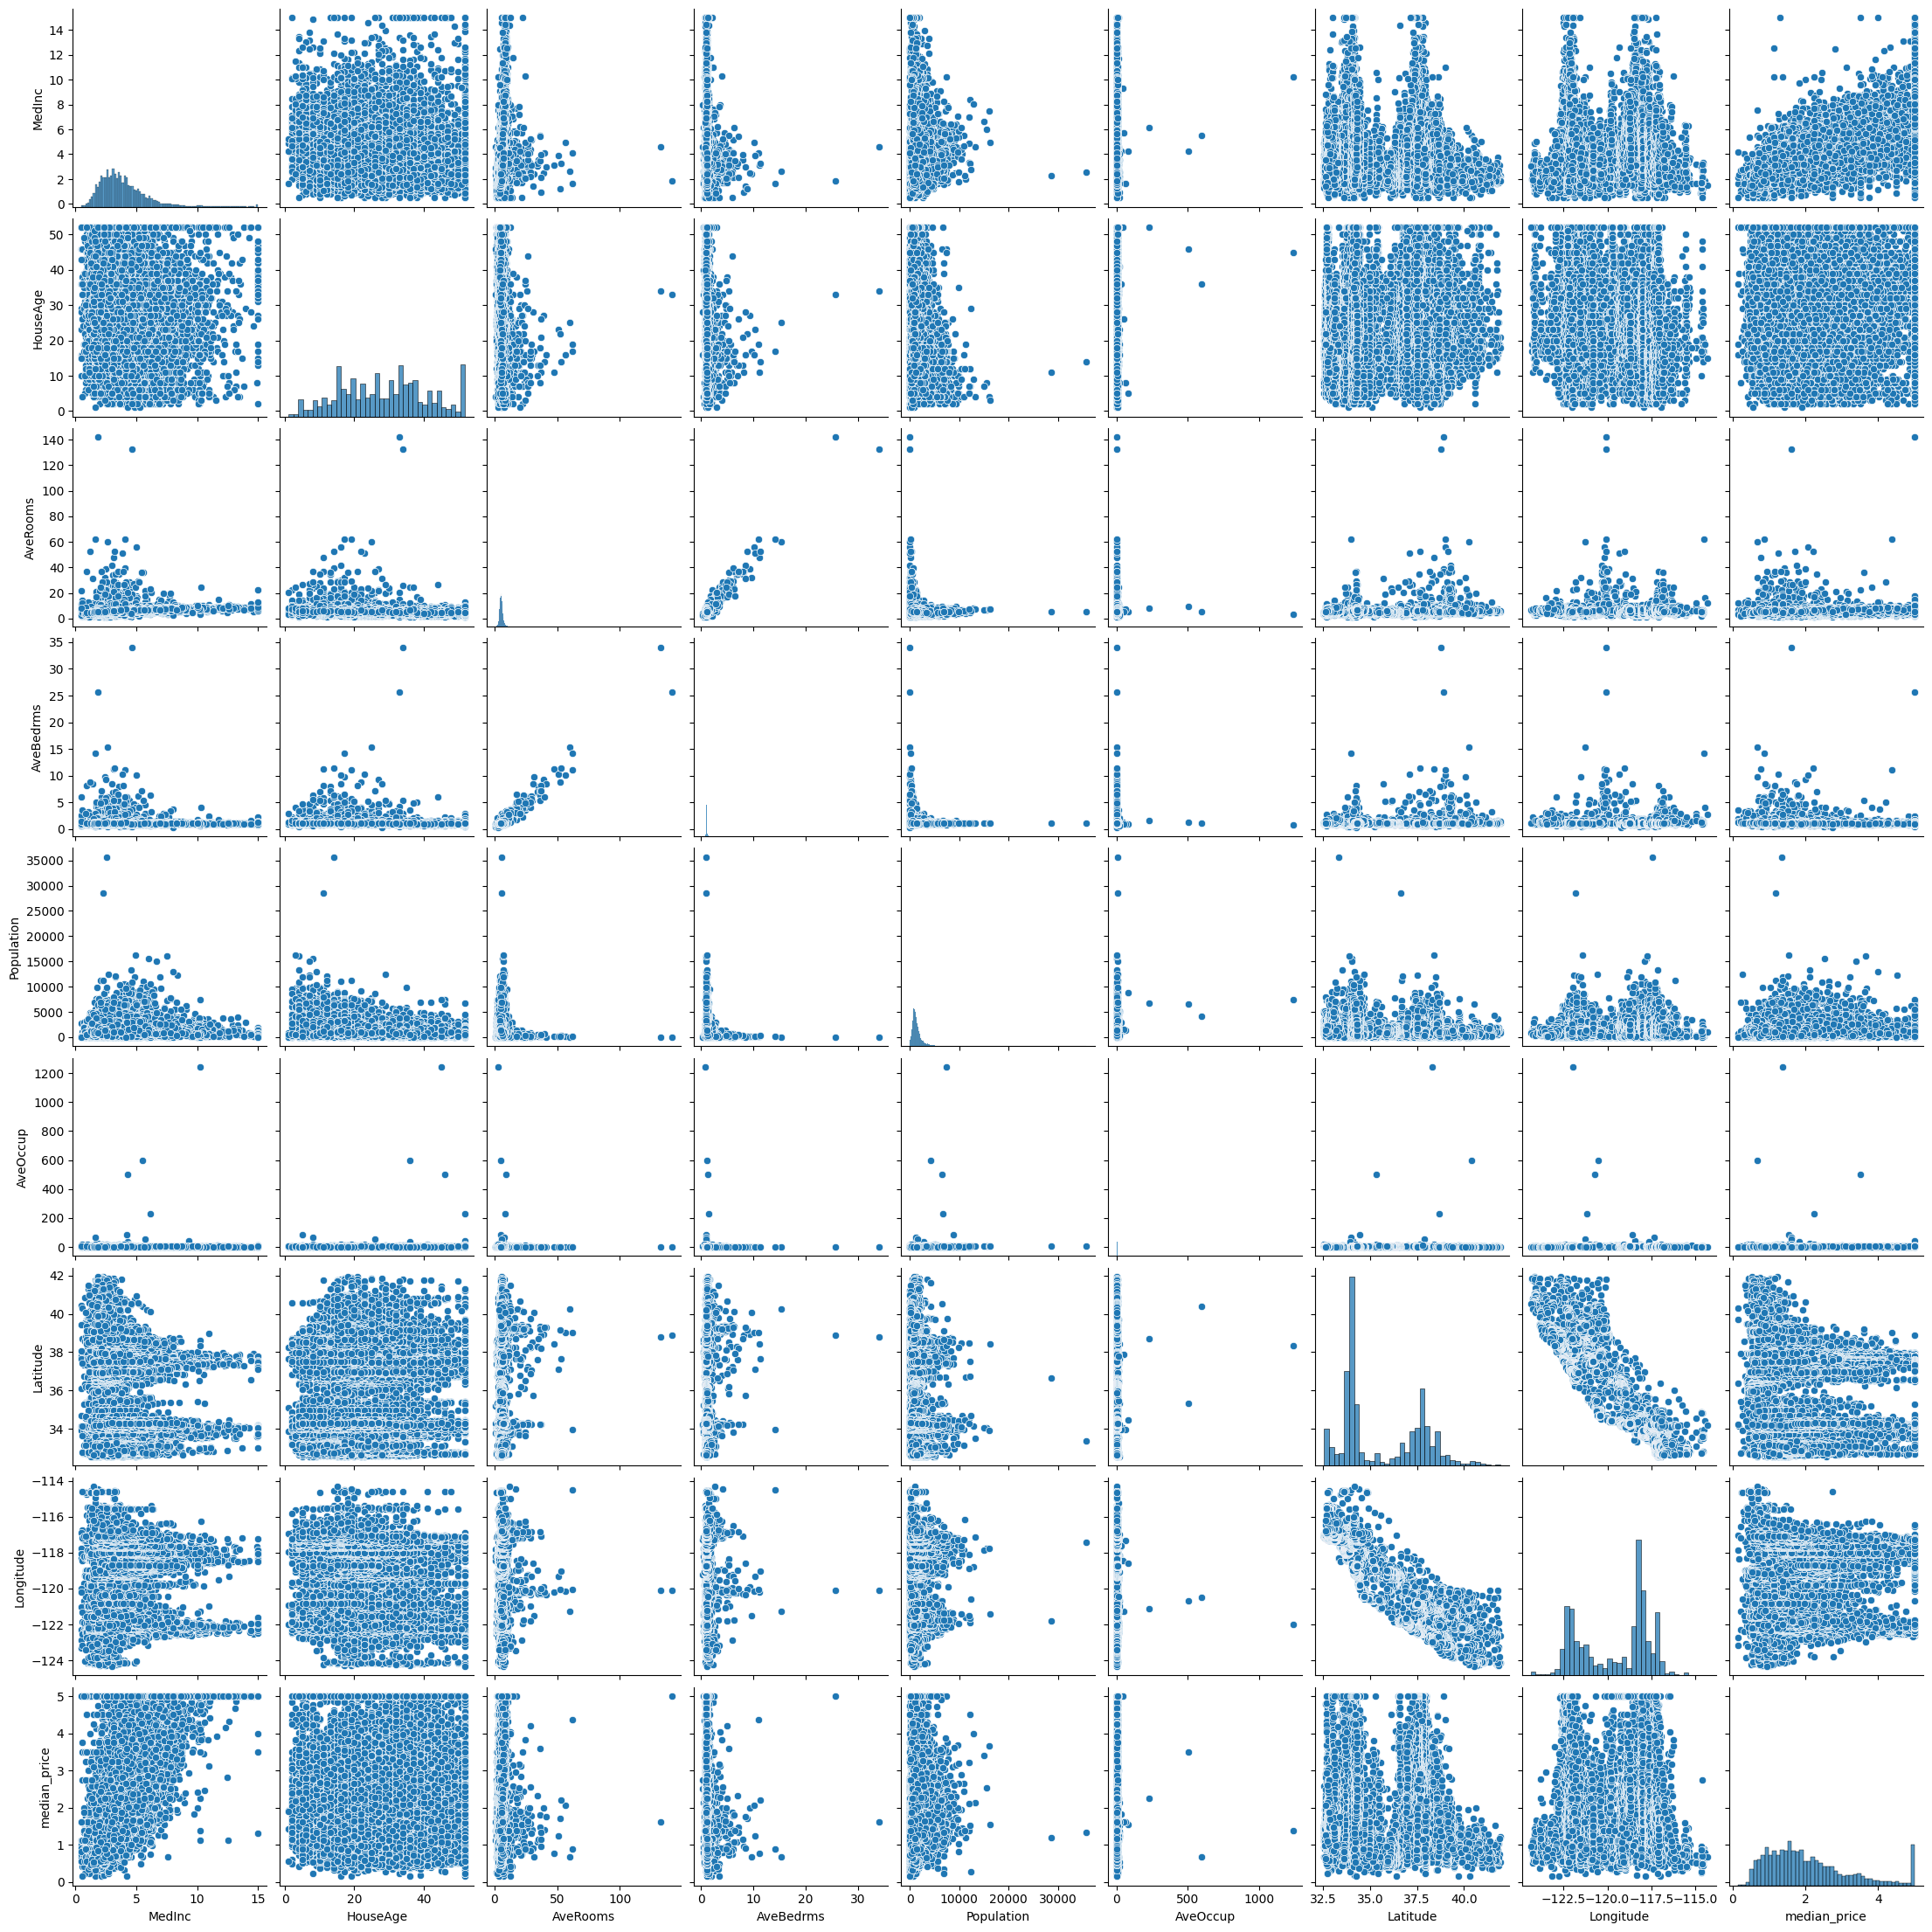

In [13]:
import seaborn as sns
sns.pairplot(dataset)

Text(0, 0.5, 'median_price')

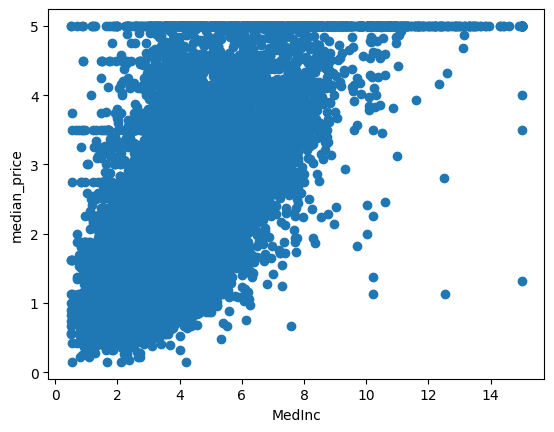

In [14]:
plt.scatter(dataset['MedInc'], dataset['median_price'])
plt.xlabel('MedInc')
plt.ylabel('median_price')

Text(0, 0.5, 'AveRooms')

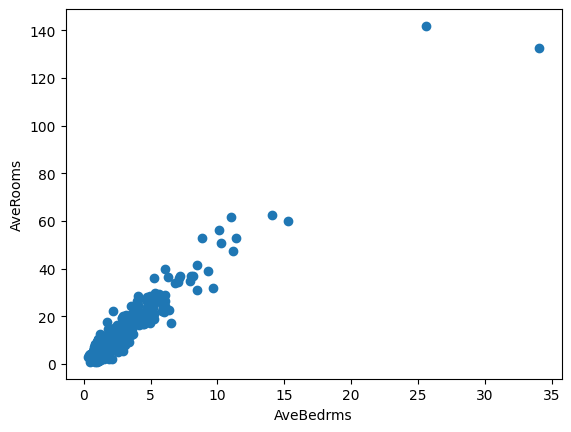

In [15]:
plt.scatter(dataset['AveBedrms'], dataset['AveRooms'])
plt.xlabel('AveBedrms')
plt.ylabel('AveRooms')

Text(0, 0.5, 'median_price')

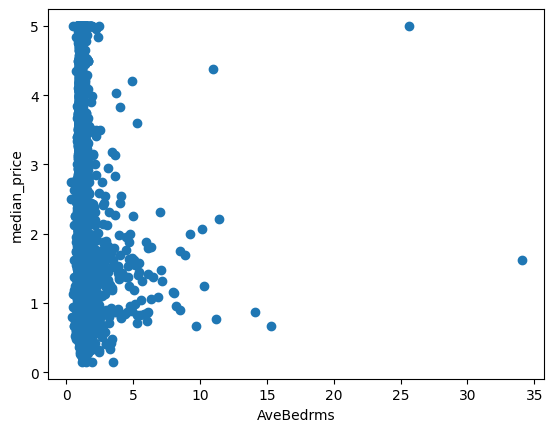

In [16]:
plt.scatter(dataset['AveBedrms'], dataset['median_price'])
plt.xlabel('AveBedrms')
plt.ylabel('median_price')

In [17]:
x = dataset.drop('median_price', axis=1)
x.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
y = dataset['median_price']
y.head()

,median_price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [20]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13240,5.3525,15.0,6.684989,1.046512,1145.0,2.420719,34.12,-117.67
12586,3.5231,37.0,5.543379,1.041096,1508.0,2.295282,38.53,-121.50
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
15456,2.1205,16.0,5.579926,1.098513,842.0,1.565056,33.18,-117.28
19798,1.8696,23.0,5.427861,1.079602,539.0,2.681592,40.54,-123.12
...,...,...,...,...,...,...,...,...
16547,4.0125,20.0,5.538226,1.076453,1191.0,3.642202,37.81,-121.22
16317,2.2130,22.0,4.358178,1.078675,781.0,1.616977,38.00,-121.32
12895,2.8106,24.0,4.886584,1.024896,1496.0,2.069156,38.65,-121.33
6012,3.9784,18.0,4.718954,1.009150,2899.0,3.789542,34.07,-117.78


In [21]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3046,2.4044,34.0,5.478632,1.079772,1101.0,3.136752,35.50,-119.28
6803,2.5750,40.0,4.329596,1.006726,1367.0,3.065022,34.08,-118.13
10112,4.5096,30.0,5.165049,0.993528,845.0,2.734628,33.94,-117.94
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79
5008,3.7727,47.0,4.536082,0.890034,653.0,2.243986,34.01,-118.33
...,...,...,...,...,...,...,...,...
15021,2.7006,17.0,4.499388,1.039780,3331.0,2.038556,32.79,-117.03
6658,3.0119,22.0,3.772009,1.083521,1005.0,2.268623,34.15,-118.12
18945,4.4882,15.0,6.573265,1.070694,2418.0,3.107969,38.28,-122.03
2499,1.7184,11.0,4.006173,1.004115,2104.0,4.329218,36.78,-120.39


# **Choosing the best model**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

lin_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())])
lin_reg = lin_pipeline.fit(x_train, y_train)
y_pred1 = lin_reg.predict(x_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_score1 = r2_score(y_test, y_pred1)
print("MSE:", mse1)
print("R2:", r2_score1)

MSE: 0.5209452603172995
R2: 0.6074054352929976


In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())])
param_grid = {
    'model__alpha': np.logspace(-3, 3, 50)}
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2')
ridge = grid_search.fit(x_train, y_train)
best_ridge = ridge.best_estimator_
y_pred2 = best_ridge.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_score2 = r2_score(y_test, y_pred2)
print("MSE:", mse2)
print("R2:", r2_score2)

MSE: 0.5208574565724781
R2: 0.6074716059170605


*   ### **After testing Ridge and Linear Regression, we observe that Ridge regression gives nearly identical performance to linear regression, which indicates that multicollinearity does not significantly impact model stability in this dataset. So, we're going to continue with linear regression**








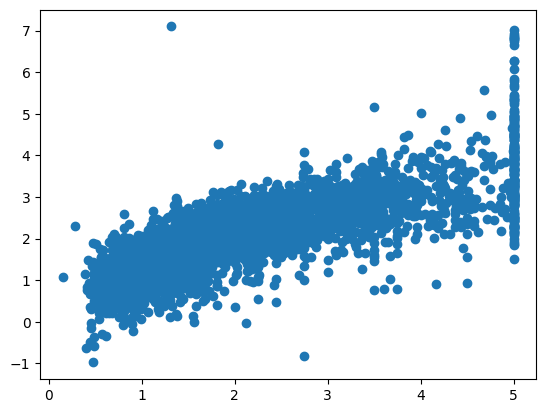

In [25]:
plt.scatter(y_test,y_pred1)

In [26]:
residuals = y_test - y_pred1
residuals

,median_price
3046,-0.740677
6803,0.581317
10112,0.082122
3126,0.382430
5008,-0.386084
...,...
15021,0.054488
6658,-0.084089
18945,-0.582152
2499,-0.375590


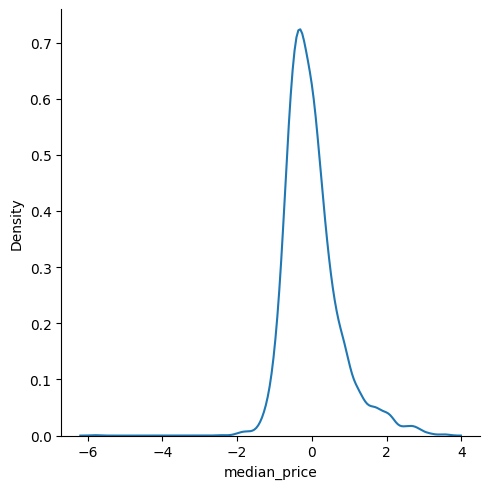

In [27]:
sns.displot(residuals, kind="kde")

# **New data prediction**

In [28]:
new_data = house.data[0].reshape(1,-1)
new_data

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [29]:
y_new_pred = lin_pipeline.predict(new_data)
print("Prediction for new data:", y_new_pred)

Prediction for new data: [4.12062524]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Pickling the model file for deployment**

In [30]:
#  Sauvegarder toute la pipeline
pickle.dump(lin_pipeline, open('lin_pipeline.pkl', 'wb'))

#  Recharger la pipeline
loaded_pipeline = pickle.load(open('lin_pipeline.pkl', 'rb'))

#  Prédire sur une nouvelle donnée
y_pred = loaded_pipeline.predict(new_data)

print("Prediction:", y_pred)


Prediction: [4.12062524]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
from google.colab import files
files.download('lin_pipeline.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>